# Guardião das Tartaruguinhas — Sistema de Apoio à Decisão Comunitária

In [46]:
# 1. Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# DADOS INICIAIS DO SISTEMA

In [47]:
# Lista de ninhos como dicionários
ninhos = [
    {"regiao": "Praia Norte", "quantidade_ovos": 102, "status": "intacto", "risco": "estável", "dias_para_eclosao": 12, "predadores": "não"},
    {"regiao": "Praia Central", "quantidade_ovos": 89, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 3, "predadores": "sim"},
    {"regiao": "Praia Sul", "quantidade_ovos": 120, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 7, "predadores": "não"},
    {"regiao": "Praia Central", "quantidade_ovos": 75, "status": "intacto", "risco": "estável", "dias_para_eclosao": 2, "predadores": "não"},
    {"regiao": "Praia Norte", "quantidade_ovos": 60, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 5, "predadores": "sim"},
    {"regiao": "Praia Sul", "quantidade_ovos": 110, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 4, "predadores": "não"},
    {"regiao": "Praia Norte", "quantidade_ovos": 98, "status": "intacto", "risco": "estável", "dias_para_eclosao": 8, "predadores": "não"},
    {"regiao": "Praia Central", "quantidade_ovos": 85, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 6, "predadores": "sim"},
    {"regiao": "Praia Sul", "quantidade_ovos": 70, "status": "intacto", "risco": "estável", "dias_para_eclosao": 3, "predadores": "não"},
    {"regiao": "Praia Norte", "quantidade_ovos": 95, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 9, "predadores": "sim"},
    {"regiao": "Praia Central", "quantidade_ovos": 88, "status": "intacto", "risco": "estável", "dias_para_eclosao": 11, "predadores": "não"},
    {"regiao": "Praia Sul", "quantidade_ovos": 77, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 4, "predadores": "sim"},
    {"regiao": "Praia Norte", "quantidade_ovos": 65, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 2, "predadores": "sim"},
    {"regiao": "Praia Central", "quantidade_ovos": 101, "status": "intacto", "risco": "estável", "dias_para_eclosao": 13, "predadores": "não"},
    {"regiao": "Praia Sul", "quantidade_ovos": 92, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 6, "predadores": "sim"},
    {"regiao": "Praia Norte", "quantidade_ovos": 83, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 5, "predadores": "não"},
    {"regiao": "Praia Central", "quantidade_ovos": 79, "status": "intacto", "risco": "estável", "dias_para_eclosao": 10, "predadores": "não"},
    {"regiao": "Praia Sul", "quantidade_ovos": 68, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 3, "predadores": "sim"},
    {"regiao": "Praia Norte", "quantidade_ovos": 90, "status": "ameaçado", "risco": "sob observação", "dias_para_eclosao": 7, "predadores": "não"},
    {"regiao": "Praia Central", "quantidade_ovos": 72, "status": "danificado", "risco": "crítico", "dias_para_eclosao": 1, "predadores": "sim"}
]

# Funções de Análise

In [48]:
# 1. Total de ninhos
def quantidade_total_ninhos(ninhos):
    return len(ninhos)

# 2. Média de ovos em ninhos com risco (não estável)
def media_ovos_risco(ninhos):
    ovos = [n["quantidade_ovos"] for n in ninhos if n["risco"] in ["sob observação", "crítico"]]
    if ovos:
        return sum(ovos) / len(ovos)
    return 0

# 3. Ninhos com até 5 dias para eclosão
def ninhos_prestes_eclodir(ninhos):
    return [n for n in ninhos if n["dias_para_eclosao"] <= 5]

# 4. Região com mais ninhos sob risco
def regiao_com_mais_risco(ninhos):
    contagem = {}
    for n in ninhos:
        if n["risco"] in ["sob observação", "crítico"]:
            regiao = n["regiao"]
            contagem[regiao] = contagem.get(regiao, 0) + 1
    if contagem:
        return max(contagem, key=contagem.get)
    return None

# 5. Ninhos com predadores e danificados
def ninhos_predadores_danificados(ninhos):
    return [n for n in ninhos if n["predadores"] and n["status"] == "danificado"]


# Validação de Entrada

In [49]:
def validar_ninho(regiao, ovos, status, risco, dias, predadores):
    # Lista de status válidos para o ninho
    status_validos = ["intacto", "ameaçado", "danificado"]

    # Lista de níveis de risco válidos
    risco_validos = ["estável", "sob observação", "crítico"]

    # Verifica se a quantidade de ovos é negativa
    if ovos < 0:
        print("Erro: Quantidade de ovos não pode ser negativa.")
        return False

    # Verifica se o status fornecido está dentro dos status válidos
    if status not in status_validos:
        print(f"Erro: Status inválido. Use: {status_validos}")
        return False

    # Verifica se o risco fornecido está dentro dos riscos válidos
    if risco not in risco_validos:
        print(f"Erro: Risco inválido. Use: {risco_validos}")
        return False

    # Verifica se o número de dias para eclosão é negativo
    if dias < 0:
        print("Erro: Dias para eclosão não pode ser negativo.")
        return False

    # Verifica se o campo 'predadores' é um booleano (True ou False)
    if not isinstance(predadores, bool):
        print("Erro: 'predadores' deve ser True ou False.")
        return False

    # Se todas as validações passarem, retorna True
    return True



# Relatório Semanal Completo

In [50]:
def exibir_relatorio(ninhos):
    # Imprime o título do relatório
    print("\n RELATÓRIO DA SEMANA:")

    # Itera sobre a lista de ninhos, enumerando a partir de 1
    for i, n in enumerate(ninhos, 1):
        # Para cada ninho, imprime os dados formatados: número, região, ovos, status, risco, dias e presença de predadores
        print(f"{i}. Região: {n['regiao']} | Ovos: {n['quantidade_ovos']} | Status: {n['status']} | Risco: {n['risco']} | Dias p/ eclosão: {n['dias_para_eclosao']} | Predadores: {n['predadores']}")


# Exibir Estatísticas

In [51]:
def exibir_estatisticas(ninhos):
    print("\n ESTATÍSTICAS:")
    print(f"Total de ninhos registrados: {quantidade_total_ninhos(ninhos)}")
    print(f"Média de ovos nos ninhos com risco: {media_ovos_risco(ninhos):.2f}")
    print(f"Ninhos prestes a eclodir (≤ 5 dias): {len(ninhos_prestes_eclodir(ninhos))}")

    regiao = regiao_com_mais_risco(ninhos)
    if regiao:
        print(f"Região com mais ninhos sob risco: {regiao}")
    else:
        print("Nenhuma região com ninhos sob risco.")

    print(f"Ninhos com predadores e danificados: {len(ninhos_predadores_danificados(ninhos))}")


# Menu Interativo Principal

In [52]:
# MENU INTERATIVO
def menu():
    while True:
        print("\n--- MENU PRINCIPAL ---")
        print("1. Inserir novo ninho")
        print("2. Visualizar relatório completo")
        print("3. Consultar estatísticas")
        print("4. Sair")

        opcao = input("Escolha uma opção: ")

        if opcao == "1":
            print("\n Inserindo novo ninho:")
            regiao = input("Região da praia: ").strip()
            try:
                ovos = int(input("Quantidade de ovos: "))
                dias = int(input("Dias para eclosão: "))
            except ValueError:
                print("Erro: ovos e dias devem ser números inteiros.")
                continue
            status = input("Status (intacto, ameaçado, danificado): ").strip().lower()
            risco = input("Risco (estável, sob observação, crítico): ").strip().lower()
            pred_input = input("Presença de predadores (sim/não): ").strip()
            predadores = True if pred_input.lower() == "sim" else False if pred_input.lower() == "não" else None

            if predadores is None:
                print("Erro: Valor de predadores deve ser sim  ou não.")
                continue

            if validar_ninho(regiao, ovos, status, risco, dias, predadores):
                novo = {"regiao": regiao, "quantidade_ovos": ovos, "status": status, "risco": risco,
                        "dias_para_eclosao": dias, "predadores": predadores}
                ninhos.append(novo)
                print("Ninho adicionado com sucesso!\n")
                print(f"Agora há {len(ninhos)} ninhos cadastrados.")
            else:
                print("Dados inválidos. Tente novamente.")

        elif opcao == "2":
            exibir_relatorio(ninhos)

        elif opcao == "3":
            exibir_estatisticas(ninhos)

        elif opcao == "4" or opcao.lower() == "sair":
            print("Encerrando o sistema. Até a próxima!")
            break
        else:
            print("Opção inválida. Tente novamente.")


# Executar o Menu

In [53]:
# Inicie o sistema
menu()



--- MENU PRINCIPAL ---
1. Inserir novo ninho
2. Visualizar relatório completo
3. Consultar estatísticas
4. Sair
Escolha uma opção: 2

 RELATÓRIO DA SEMANA:
1. Região: Praia Norte | Ovos: 102 | Status: intacto | Risco: estável | Dias p/ eclosão: 12 | Predadores: não
2. Região: Praia Central | Ovos: 89 | Status: danificado | Risco: crítico | Dias p/ eclosão: 3 | Predadores: sim
3. Região: Praia Sul | Ovos: 120 | Status: ameaçado | Risco: sob observação | Dias p/ eclosão: 7 | Predadores: não
4. Região: Praia Central | Ovos: 75 | Status: intacto | Risco: estável | Dias p/ eclosão: 2 | Predadores: não
5. Região: Praia Norte | Ovos: 60 | Status: danificado | Risco: crítico | Dias p/ eclosão: 5 | Predadores: sim
6. Região: Praia Sul | Ovos: 110 | Status: ameaçado | Risco: sob observação | Dias p/ eclosão: 4 | Predadores: não
7. Região: Praia Norte | Ovos: 98 | Status: intacto | Risco: estável | Dias p/ eclosão: 8 | Predadores: não
8. Região: Praia Central | Ovos: 85 | Status: danificado | Ri

acesso colab : https://colab.research.google.com/drive/1o6SJuvTSL4Aq1IukZ0Mbhb3a16HTRz9f#scrollTo=qy2Kiyq6oZYA&uniqifier=2

#Extra Gerar relatorio em PDF

🐢 SISTEMA DE CONSERVAÇÃO DE TARTARUGAS MARINHAS
📊 Total de ninhos monitorados: 20
🏖️ Praias em monitoramento: 3
🥚 Total de ovos: 1719

📈 ANÁLISE EXPLORATÓRIA DOS DADOS

🔢 Estatísticas por Região:
              quantidade_ovos             dias_para_eclosao
                        count  sum   mean              mean
regiao                                                     
Praia Central               7  589  84.14              6.57
Praia Norte                 7  593  84.71              6.86
Praia Sul                   6  537  89.50              4.50

⚠️ Distribuição de Riscos:
risco
estável           7
crítico           7
sob observação    6
Name: count, dtype: int64

🎯 Prioridades de Conservação:
prioridade_conservacao
emergencial    8
baixa          5
alta           5
média          2
Name: count, dtype: int64


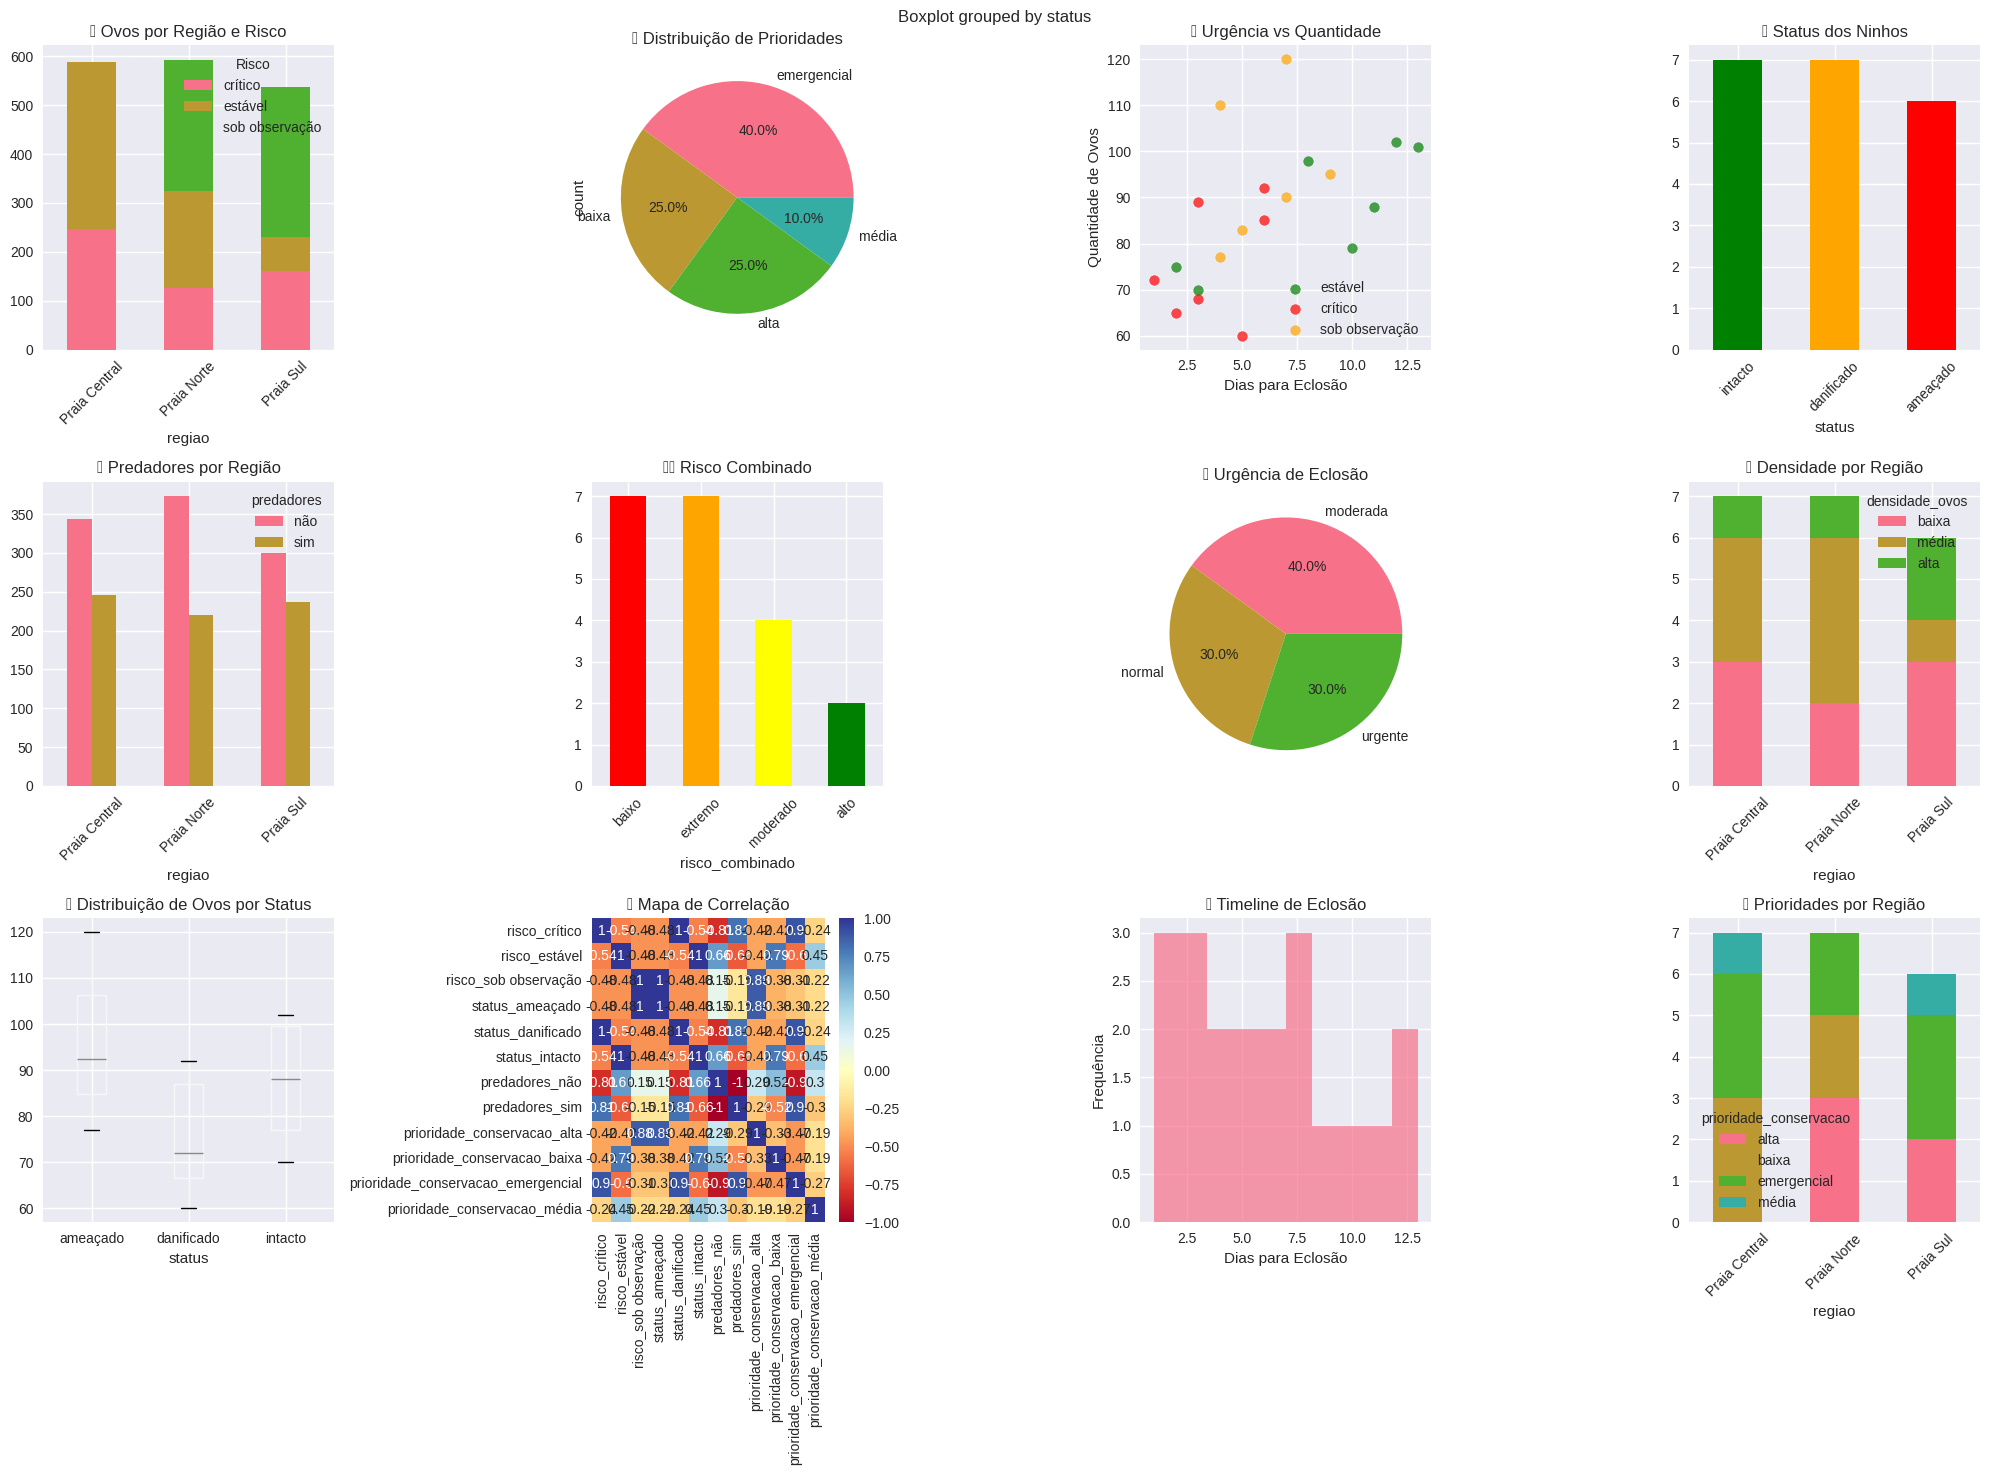


🤖 MACHINE LEARNING - MODELO PREDITIVO
🎯 Acurácia do modelo: 100.00%

📊 Relatório de Classificação:
              precision    recall  f1-score   support

        alta       1.00      1.00      1.00         2
       baixa       1.00      1.00      1.00         1
 emergencial       1.00      1.00      1.00         2
       média       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



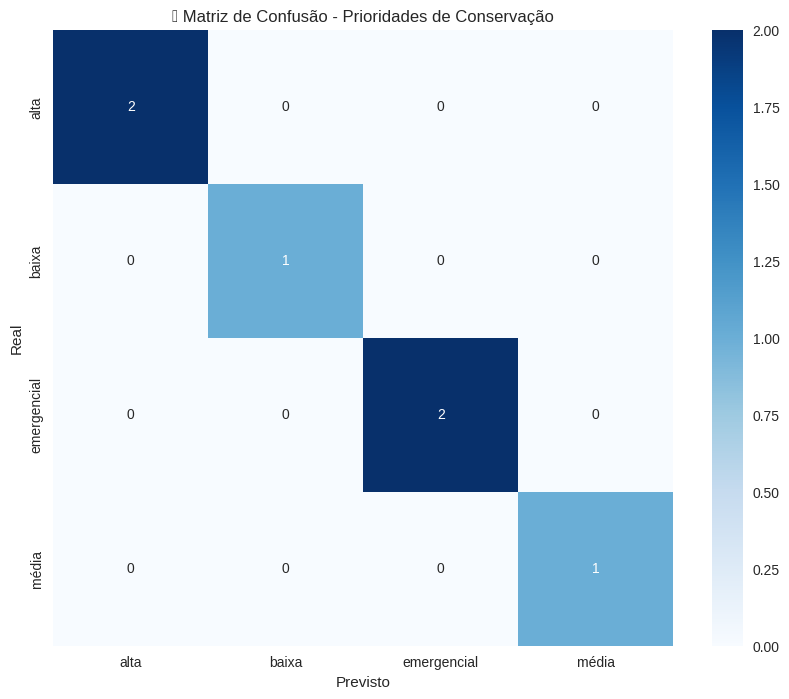

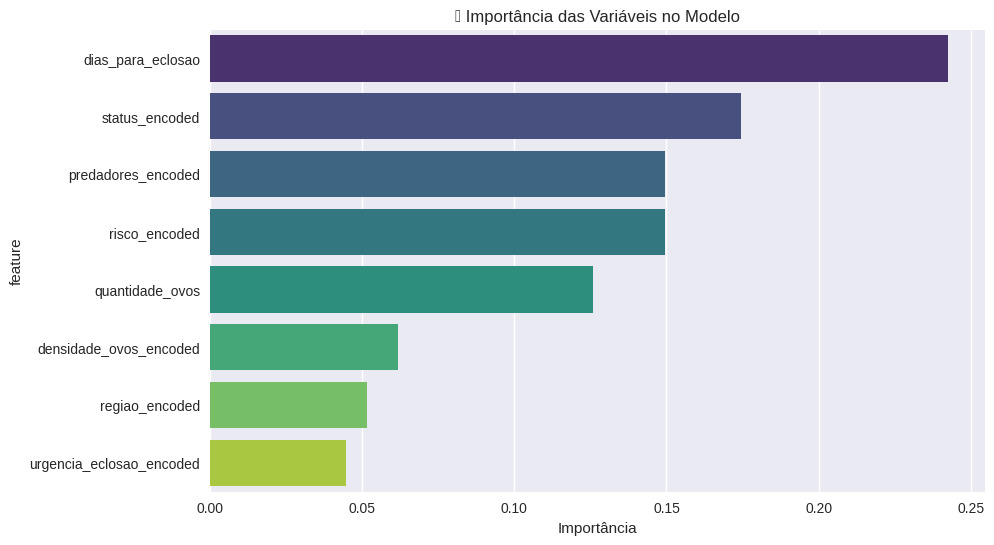


🔝 Top 5 Variáveis Mais Importantes:
              feature  importance
1   dias_para_eclosao    0.242505
3      status_encoded    0.174538
5  predadores_encoded    0.149522
4       risco_encoded    0.149409
0     quantidade_ovos    0.125712

🔗 ANÁLISE DE CLUSTERING


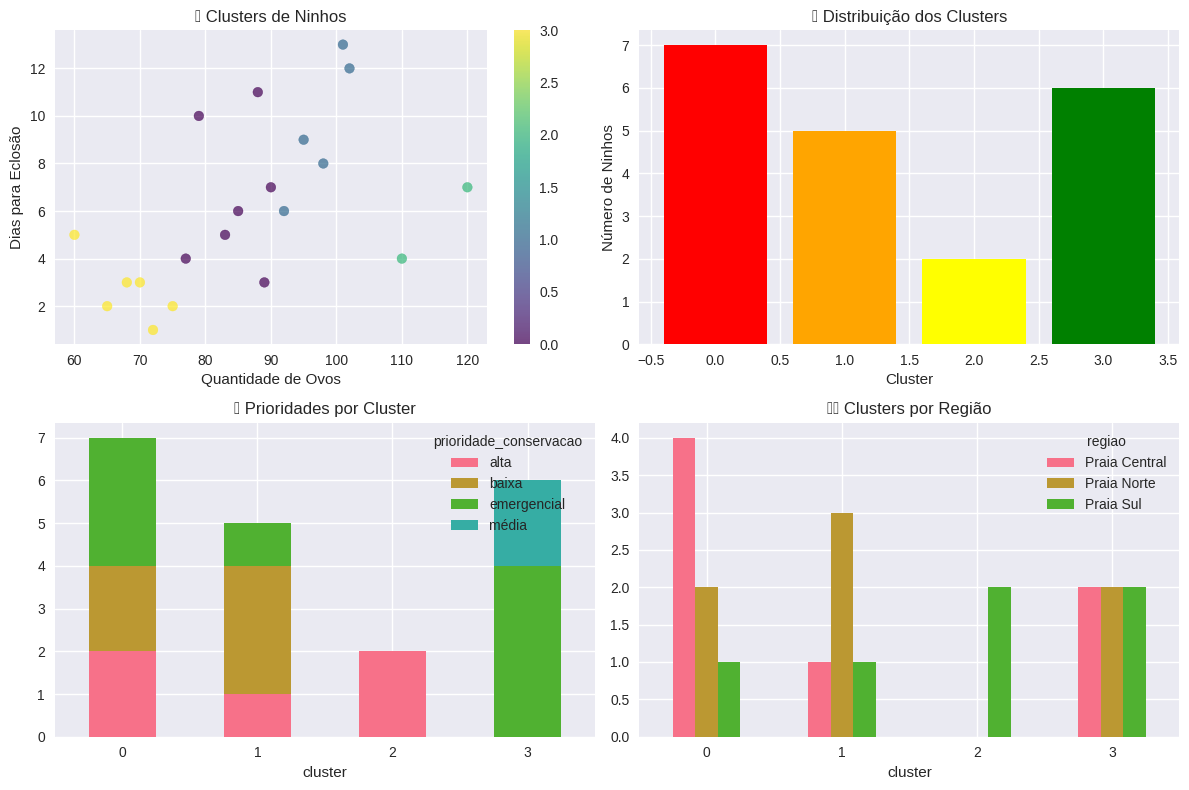


📋 Análise dos Clusters:

🔴 CLUSTER 0 (7 ninhos):
   • Ovos médio: 84.4
   • Dias médio para eclosão: 6.6
   • Risco predominante: sob observação
   • Predadores: 3/7 ninhos

🔴 CLUSTER 1 (5 ninhos):
   • Ovos médio: 97.6
   • Dias médio para eclosão: 9.6
   • Risco predominante: estável
   • Predadores: 2/5 ninhos

🔴 CLUSTER 2 (2 ninhos):
   • Ovos médio: 115.0
   • Dias médio para eclosão: 5.5
   • Risco predominante: sob observação
   • Predadores: 0/2 ninhos

🔴 CLUSTER 3 (6 ninhos):
   • Ovos médio: 68.3
   • Dias médio para eclosão: 2.7
   • Risco predominante: crítico
   • Predadores: 4/6 ninhos

🚨 SISTEMA DE ALERTAS E RECOMENDAÇÕES
🆘 NINHOS EM SITUAÇÃO EMERGENCIAL: 8

🔴 NINHO 2 - Praia Central
   📊 Situação: 89 ovos, 3 dias para eclosão
   ⚠️ Status: danificado, Risco: crítico
   🦎 Predadores: sim
   📋 AÇÕES: 🚨 Relocação imediata do ninho | 👥 Monitoramento 24h | 🔧 Reparo estrutural urgente | 🛡️ Instalação de proteção física | 🗯️ Instalação de cercas protetoras | 📹 Vigilância por 

In [58]:
# Configuração para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPARAÇÃO DOS DADOS
# =============================================================================

df = pd.DataFrame(ninhos)
print("🐢 SISTEMA DE CONSERVAÇÃO DE TARTARUGAS MARINHAS")
print("=" * 60)
print(f"📊 Total de ninhos monitorados: {len(df)}")
print(f"🏖️ Praias em monitoramento: {df['regiao'].nunique()}")
print(f"🥚 Total de ovos: {df['quantidade_ovos'].sum()}")

# Criação de features adicionais
df['urgencia_eclosao'] = df['dias_para_eclosao'].apply(lambda x: 'urgente' if x <= 3 else 'moderada' if x <= 7 else 'normal')
df['densidade_ovos'] = pd.cut(df['quantidade_ovos'], bins=3, labels=['baixa', 'média', 'alta'])
df['risco_combinado'] = df.apply(lambda row: 'extremo' if row['risco'] == 'crítico' and row['predadores'] == 'sim'
                                 else 'alto' if row['risco'] == 'crítico' or row['predadores'] == 'sim'
                                 else 'moderado' if row['risco'] == 'sob observação'
                                 else 'baixo', axis=1)

# Definição de prioridade de conservação
def definir_prioridade_conservacao(row):
    score = 0
    # Critérios de prioridade
    if row['risco'] == 'crítico': score += 4
    elif row['risco'] == 'sob observação': score += 2

    if row['status'] == 'danificado': score += 3
    elif row['status'] == 'ameaçado': score += 2

    if row['predadores'] == 'sim': score += 3
    if row['dias_para_eclosao'] <= 3: score += 3
    elif row['dias_para_eclosao'] <= 7: score += 1

    if score >= 8: return 'emergencial'
    elif score >= 5: return 'alta'
    elif score >= 2: return 'média'
    else: return 'baixa'

df['prioridade_conservacao'] = df.apply(definir_prioridade_conservacao, axis=1)

# Definição de ações recomendadas
def recomendar_acoes(row):
    acoes = []

    if row['risco'] == 'crítico':
        acoes.append("🚨 Relocação imediata do ninho")
        acoes.append("👥 Monitoramento 24h")

    if row['status'] == 'danificado':
        acoes.append("🔧 Reparo estrutural urgente")
        acoes.append("🛡️ Instalação de proteção física")

    if row['predadores'] == 'sim':
        acoes.append("🗯️ Instalação de cercas protetoras")
        acoes.append("📹 Vigilância por câmeras")
        acoes.append("🦎 Controle de predadores")

    if row['dias_para_eclosao'] <= 3:
        acoes.append("⏰ Monitoramento intensivo")
        acoes.append("🚑 Equipe de emergência em standby")

    if row['quantidade_ovos'] > 100:
        acoes.append("📈 Ninho de alta densidade - atenção especial")

    if row['risco'] == 'estável' and row['predadores'] == 'não':
        acoes.append("✅ Monitoramento de rotina")

    return " | ".join(acoes) if acoes else "✅ Monitoramento padrão"

df['acoes_recomendadas'] = df.apply(recomendar_acoes, axis=1)

# =============================================================================
# ANÁLISE EXPLORATÓRIA
# =============================================================================

print("\n📈 ANÁLISE EXPLORATÓRIA DOS DADOS")
print("=" * 60)

# Estatísticas básicas
print("\n🔢 Estatísticas por Região:")
print(df.groupby('regiao').agg({
    'quantidade_ovos': ['count', 'sum', 'mean'],
    'dias_para_eclosao': 'mean'
}).round(2))

print("\n⚠️ Distribuição de Riscos:")
print(df['risco'].value_counts())

print("\n🎯 Prioridades de Conservação:")
print(df['prioridade_conservacao'].value_counts())

# =============================================================================
# VISUALIZAÇÕES
# =============================================================================

plt.figure(figsize=(20, 15))

# 1. Distribuição de ovos por região e risco
plt.subplot(3, 4, 1)
risk_region = df.groupby(['regiao', 'risco'])['quantidade_ovos'].sum().unstack().fillna(0)
risk_region.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('🥚 Ovos por Região e Risco')
plt.xticks(rotation=45)
plt.legend(title='Risco')

# 2. Prioridades de conservação
plt.subplot(3, 4, 2)
df['prioridade_conservacao'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('🎯 Distribuição de Prioridades')

# 3. Dias para eclosão vs Quantidade de ovos
plt.subplot(3, 4, 3)
scatter_colors = {'crítico': 'red', 'sob observação': 'orange', 'estável': 'green'}
for risco in df['risco'].unique():
    subset = df[df['risco'] == risco]
    plt.scatter(subset['dias_para_eclosao'], subset['quantidade_ovos'],
               label=risco, alpha=0.7, c=scatter_colors.get(risco, 'blue'))
plt.xlabel('Dias para Eclosão')
plt.ylabel('Quantidade de Ovos')
plt.title('⏰ Urgência vs Quantidade')
plt.legend()

# 4. Status dos ninhos
plt.subplot(3, 4, 4)
df['status'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('📊 Status dos Ninhos')
plt.xticks(rotation=45)

# 5. Predadores por região
plt.subplot(3, 4, 5)
pred_region = df.groupby(['regiao', 'predadores'])['quantidade_ovos'].sum().unstack().fillna(0)
pred_region.plot(kind='bar', ax=plt.gca())
plt.title('🦎 Predadores por Região')
plt.xticks(rotation=45)

# 6. Risco combinado
plt.subplot(3, 4, 6)
df['risco_combinado'].value_counts().plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('⚠️ Risco Combinado')
plt.xticks(rotation=45)

# 7. Urgência de eclosão
plt.subplot(3, 4, 7)
df['urgencia_eclosao'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('⏳ Urgência de Eclosão')
plt.ylabel('')  # Remove o ylabel padrão do pie chart

# 8. Densidade de ovos por região
plt.subplot(3, 4, 8)
density_region = df.groupby(['regiao', 'densidade_ovos']).size().unstack().fillna(0)
density_region.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('📈 Densidade por Região')
plt.xticks(rotation=45)

# 9. Box plot - Ovos por status
plt.subplot(3, 4, 9)
df.boxplot(column='quantidade_ovos', by='status', ax=plt.gca())
plt.title('📦 Distribuição de Ovos por Status')

# 10. Heat map - Correlação de riscos
plt.subplot(3, 4, 10)
corr_data = pd.get_dummies(df[['risco', 'status', 'predadores', 'prioridade_conservacao']])
sns.heatmap(corr_data.corr(), annot=True, cmap='RdYlBu', center=0, ax=plt.gca())
plt.title('🔥 Mapa de Correlação')

# 11. Timeline de eclosão
plt.subplot(3, 4, 11)
df.hist(column='dias_para_eclosao', bins=10, ax=plt.gca(), alpha=0.7)
plt.xlabel('Dias para Eclosão')
plt.ylabel('Frequência')
plt.title('📅 Timeline de Eclosão')

# 12. Prioridade por região
plt.subplot(3, 4, 12)
priority_region = df.groupby(['regiao', 'prioridade_conservacao']).size().unstack().fillna(0)
priority_region.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('🎯 Prioridades por Região')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# =============================================================================
# MACHINE LEARNING - MODELO PREDITIVO
# =============================================================================

print("\n🤖 MACHINE LEARNING - MODELO PREDITIVO")
print("=" * 60)

# Preparação dos dados para ML
df_ml = df.copy()

# Encoding das variáveis categóricas
categorical_cols = ['regiao', 'status', 'risco', 'predadores', 'urgencia_eclosao', 'densidade_ovos']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col + '_encoded'] = le.fit_transform(df_ml[col])
    label_encoders[col] = le

# Features para o modelo
feature_cols = ['quantidade_ovos', 'dias_para_eclosao'] + [col + '_encoded' for col in categorical_cols]
X = df_ml[feature_cols]
y = df_ml['prioridade_conservacao']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinamento do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Acurácia do modelo: {accuracy:.2%}")
print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('🔍 Matriz de Confusão - Prioridades de Conservação')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Importância das features
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('🔬 Importância das Variáveis no Modelo')
plt.xlabel('Importância')
plt.show()

print("\n🔝 Top 5 Variáveis Mais Importantes:")
print(feature_importance.head())

# =============================================================================
# CLUSTERING - AGRUPAMENTO DE NINHOS
# =============================================================================

print("\n🔗 ANÁLISE DE CLUSTERING")
print("=" * 60)

# Preparação dos dados para clustering
X_cluster = df_ml[['quantidade_ovos', 'dias_para_eclosao', 'risco_encoded', 'predadores_encoded']]

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_ml['cluster'] = kmeans.fit_predict(X_cluster)

# Visualização dos clusters
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
scatter = plt.scatter(df_ml['quantidade_ovos'], df_ml['dias_para_eclosao'],
                     c=df_ml['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Quantidade de Ovos')
plt.ylabel('Dias para Eclosão')
plt.title('🎯 Clusters de Ninhos')
plt.colorbar(scatter)

plt.subplot(2, 2, 2)
cluster_counts = df_ml['cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'orange', 'yellow', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Número de Ninhos')
plt.title('📊 Distribuição dos Clusters')

plt.subplot(2, 2, 3)
cluster_priority = pd.crosstab(df_ml['cluster'], df_ml['prioridade_conservacao'])
cluster_priority.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('🎯 Prioridades por Cluster')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
cluster_region = pd.crosstab(df_ml['cluster'], df_ml['regiao'])
cluster_region.plot(kind='bar', ax=plt.gca())
plt.title('🏖️ Clusters por Região')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Análise dos clusters
print("\n📋 Análise dos Clusters:")
for cluster_id in sorted(df_ml['cluster'].unique()):
    cluster_data = df_ml[df_ml['cluster'] == cluster_id]
    print(f"\n🔴 CLUSTER {cluster_id} ({len(cluster_data)} ninhos):")
    print(f"   • Ovos médio: {cluster_data['quantidade_ovos'].mean():.1f}")
    print(f"   • Dias médio para eclosão: {cluster_data['dias_para_eclosao'].mean():.1f}")
    print(f"   • Risco predominante: {cluster_data['risco'].mode().iloc[0]}")
    print(f"   • Predadores: {(cluster_data['predadores'] == 'sim').sum()}/{len(cluster_data)} ninhos")

# =============================================================================
# SISTEMA DE RECOMENDAÇÕES E ALERTAS
# =============================================================================

print("\n🚨 SISTEMA DE ALERTAS E RECOMENDAÇÕES")
print("=" * 70)

# Ninhos críticos que precisam ação imediata
ninhos_criticos = df[df['prioridade_conservacao'] == 'emergencial']
print(f"🆘 NINHOS EM SITUAÇÃO EMERGENCIAL: {len(ninhos_criticos)}")

if len(ninhos_criticos) > 0:
    for idx, ninho in ninhos_criticos.iterrows():
        print(f"\n🔴 NINHO {idx + 1} - {ninho['regiao']}")
        print(f"   📊 Situação: {ninho['quantidade_ovos']} ovos, {ninho['dias_para_eclosao']} dias para eclosão")
        print(f"   ⚠️ Status: {ninho['status']}, Risco: {ninho['risco']}")
        print(f"   🦎 Predadores: {ninho['predadores']}")
        print(f"   📋 AÇÕES: {ninho['acoes_recomendadas']}")

# Resumo de ações por região
print(f"\n📍 RESUMO POR REGIÃO:")
for regiao in df['regiao'].unique():
    regiao_data = df[df['regiao'] == regiao]
    emergencial = len(regiao_data[regiao_data['prioridade_conservacao'] == 'emergencial'])
    alta = len(regiao_data[regiao_data['prioridade_conservacao'] == 'alta'])

    print(f"\n🏖️ {regiao}:")
    print(f"   • Total de ninhos: {len(regiao_data)}")
    print(f"   • Emergencial: {emergencial}")
    print(f"   • Alta prioridade: {alta}")
    print(f"   • Total de ovos: {regiao_data['quantidade_ovos'].sum()}")

# =============================================================================
# FUNÇÃO DE PREVISÃO PARA NOVOS NINHOS
# =============================================================================

def prever_novo_ninho(regiao, quantidade_ovos, status, risco, dias_para_eclosao, predadores):
    """
    Função para prever a prioridade de conservação de um novo ninho
    """
    # Criar DataFrame com o novo ninho
    novo_ninho_data = {
        'regiao': regiao,
        'quantidade_ovos': quantidade_ovos,
        'status': status,
        'risco': risco,
        'dias_para_eclosao': dias_para_eclosao,
        'predadores': predadores,
        'urgencia_eclosao': 'urgente' if dias_para_eclosao <= 3 else 'moderada' if dias_para_eclosao <= 7 else 'normal',
        'densidade_ovos': 'alta' if quantidade_ovos > 90 else 'média' if quantidade_ovos > 75 else 'baixa'
    }

    novo_df = pd.DataFrame([novo_ninho_data])

    # Encoding
    for col in categorical_cols:
        if col in label_encoders:
            try:
                novo_df[col + '_encoded'] = label_encoders[col].transform(novo_df[col])
            except ValueError:
                # Se o valor não foi visto no treino, usar o valor mais comum
                novo_df[col + '_encoded'] = 0

    # Previsão
    X_novo = novo_df[feature_cols]
    prioridade_pred = model.predict(X_novo)[0]
    probabilidade = model.predict_proba(X_novo)[0].max()

    # Gerar ações recomendadas
    acoes = recomendar_acoes(novo_df.iloc[0])

    return prioridade_pred, probabilidade, acoes

# Exemplo de uso da função de previsão
print("\n🔮 EXEMPLO DE PREVISÃO PARA NOVO NINHO:")
print("=" * 70)

exemplo_prioridade, exemplo_prob, exemplo_acoes = prever_novo_ninho(
    regiao="Praia Leste",
    quantidade_ovos=95,
    status="ameaçado",
    risco="crítico",
    dias_para_eclosao=2,
    predadores="sim"
)

print(f"🎯 Prioridade prevista: {exemplo_prioridade}")
print(f"📊 Confiança: {exemplo_prob:.2%}")
print(f"📋 Ações recomendadas: {exemplo_acoes}")


# =============================================================================
# GERAÇÃO DE RELATÓRIO PDF
# =============================================================================

from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import matplotlib.patches as mpatches

def gerar_relatorio_pdf():
    """
    Gera um relatório completo em PDF com todas as análises
    """
    filename = f'relatorio_conservacao_tartarugas_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'

    with PdfPages(filename) as pdf:
        # Página 1: Capa do Relatório
        fig = plt.figure(figsize=(8.5, 11))
        plt.text(0.5, 0.9, '🐢 RELATÓRIO DE CONSERVAÇÃO',
                ha='center', va='center', fontsize=24, weight='bold',
                transform=fig.transFigure)
        plt.text(0.5, 0.8, 'TARTARUGAS MARINHAS',
                ha='center', va='center', fontsize=20, weight='bold',
                transform=fig.transFigure)
        plt.text(0.5, 0.7, f'Data: {datetime.now().strftime("%d/%m/%Y %H:%M")}',
                ha='center', va='center', fontsize=14,
                transform=fig.transFigure)

        # Resumo executivo na capa
        resumo_texto = f"""
        📊 RESUMO EXECUTIVO

        • Total de ninhos monitorados: {len(df)}
        • Total de ovos: {df['quantidade_ovos'].sum():,}
        • Praias em monitoramento: {df['regiao'].nunique()}

        🚨 SITUAÇÃO CRÍTICA:
        • Ninhos emergenciais: {len(ninhos_criticos)} ({len(ninhos_criticos)/len(df)*100:.1f}%)
        • Alta prioridade: {len(df[df['prioridade_conservacao'] == 'alta'])} ({len(df[df['prioridade_conservacao'] == 'alta'])/len(df)*100:.1f}%)

        🎯 Precisão do modelo preditivo: {accuracy:.1%}

        ⚠️ AÇÃO REQUERIDA: {len(ninhos_criticos) + len(df[df['prioridade_conservacao'] == 'alta'])} ninhos
        precisam de intervenção imediata!
        """

        plt.text(0.1, 0.5, resumo_texto, ha='left', va='center', fontsize=12,
                transform=fig.transFigure, bbox=dict(boxstyle="round,pad=0.5",
                facecolor="lightblue", alpha=0.8))

        plt.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 2: Gráficos de Análise Geral
        fig, axes = plt.subplots(2, 2, figsize=(11, 8.5))
        fig.suptitle('📊 ANÁLISE GERAL DOS NINHOS', fontsize=16, weight='bold')

        # Gráfico 1: Prioridades
        df['prioridade_conservacao'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                                        ax=axes[0,0], colors=['red', 'orange', 'yellow', 'green'])
        axes[0,0].set_title('🎯 Prioridades de Conservação')
        axes[0,0].set_ylabel('')

        # Gráfico 2: Status por região
        status_region = df.groupby(['regiao', 'status'])['quantidade_ovos'].sum().unstack().fillna(0)
        status_region.plot(kind='bar', ax=axes[0,1], color=['green', 'orange', 'red'])
        axes[0,1].set_title('📊 Status dos Ninhos por Região')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Gráfico 3: Risco vs Predadores
        risk_pred = pd.crosstab(df['risco'], df['predadores'])
        risk_pred.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'salmon'])
        axes[1,0].set_title('⚠️ Risco vs Presença de Predadores')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Gráfico 4: Timeline de eclosão
        axes[1,1].hist(df['dias_para_eclosao'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,1].axvline(df['dias_para_eclosao'].mean(), color='red', linestyle='--',
                         label=f'Média: {df["dias_para_eclosao"].mean():.1f} dias')
        axes[1,1].set_title('⏰ Distribuição de Dias para Eclosão')
        axes[1,1].set_xlabel('Dias para Eclosão')
        axes[1,1].set_ylabel('Frequência')
        axes[1,1].legend()

        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 3: Análise Detalhada por Região
        fig, axes = plt.subplots(2, 2, figsize=(11, 8.5))
        fig.suptitle('🏖️ ANÁLISE DETALHADA POR REGIÃO', fontsize=16, weight='bold')

        # Gráfico 1: Ovos por região e risco
        risk_region = df.groupby(['regiao', 'risco'])['quantidade_ovos'].sum().unstack().fillna(0)
        risk_region.plot(kind='bar', stacked=True, ax=axes[0,0],
                        color=['green', 'orange', 'red'])
        axes[0,0].set_title('🥚 Distribuição de Ovos por Risco')
        axes[0,0].tick_params(axis='x', rotation=45)

        # Gráfico 2: Predadores por região
        pred_region = df.groupby(['regiao', 'predadores'])['quantidade_ovos'].sum().unstack().fillna(0)
        pred_region.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'salmon'])
        axes[0,1].set_title('🦎 Impacto de Predadores por Região')
        axes[0,1].tick_params(axis='x', rotation=45)

        # Gráfico 3: Boxplot - Distribuição de ovos
        df.boxplot(column='quantidade_ovos', by='regiao', ax=axes[1,0])
        axes[1,0].set_title('📦 Distribuição de Ovos por Região')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Gráfico 4: Urgência por região
        urgencia_regiao = pd.crosstab(df['regiao'], df['urgencia_eclosao'])
        urgencia_regiao.plot(kind='bar', stacked=True, ax=axes[1,1],
                           color=['red', 'orange', 'green'])
        axes[1,1].set_title('⏳ Urgência de Eclosão por Região')
        axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 4: Machine Learning - Resultados
        fig, axes = plt.subplots(2, 2, figsize=(11, 8.5))
        fig.suptitle('🤖 RESULTADOS DO MACHINE LEARNING', fontsize=16, weight='bold')

        # Matriz de confusão
        cm = confusion_matrix(y_test, y_pred)
        im = axes[0,0].imshow(cm, interpolation='nearest', cmap='Blues')
        axes[0,0].set_title(f'🎯 Matriz de Confusão\nAcurácia: {accuracy:.1%}')
        tick_marks = np.arange(len(model.classes_))
        axes[0,0].set_xticks(tick_marks)
        axes[0,0].set_yticks(tick_marks)
        axes[0,0].set_xticklabels(model.classes_, rotation=45)
        axes[0,0].set_yticklabels(model.classes_)

        # Adicionar números na matriz
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            axes[0,0].text(j, i, format(cm[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > thresh else "black")

        # Importância das features
        feature_importance.plot(x='feature', y='importance', kind='barh', ax=axes[0,1])
        axes[0,1].set_title('🔬 Importância das Variáveis')

        # Clusters
        scatter = axes[1,0].scatter(df_ml['quantidade_ovos'], df_ml['dias_para_eclosao'],
                                  c=df_ml['cluster'], cmap='viridis', alpha=0.7, s=50)
        axes[1,0].set_xlabel('Quantidade de Ovos')
        axes[1,0].set_ylabel('Dias para Eclosão')
        axes[1,0].set_title('🎯 Clusters de Ninhos')

        # Distribuição dos clusters
        cluster_counts = df_ml['cluster'].value_counts().sort_index()
        axes[1,1].bar(cluster_counts.index, cluster_counts.values,
                     color=['red', 'orange', 'yellow', 'green'])
        axes[1,1].set_xlabel('Cluster')
        axes[1,1].set_ylabel('Número de Ninhos')
        axes[1,1].set_title('📊 Distribuição dos Clusters')

        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 5: Ninhos Emergenciais - Detalhamento
        fig = plt.figure(figsize=(8.5, 11))
        plt.text(0.5, 0.95, '🆘 NINHOS EMERGENCIAIS - AÇÃO IMEDIATA',
                ha='center', va='center', fontsize=18, weight='bold',
                transform=fig.transFigure, color='red')

        y_pos = 0.88
        for idx, ninho in ninhos_criticos.iterrows():
            ninho_info = f"""
🔴 NINHO {idx + 1} - {ninho['regiao']}
   📊 Dados: {ninho['quantidade_ovos']} ovos | {ninho['dias_para_eclosao']} dias para eclosão
   ⚠️ Status: {ninho['status']} | Risco: {ninho['risco']}
   🦎 Predadores: {ninho['predadores']}

   📋 AÇÕES PRIORITÁRIAS:
   {ninho['acoes_recomendadas']}
            """

            plt.text(0.05, y_pos, ninho_info, ha='left', va='top', fontsize=10,
                    transform=fig.transFigure,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="mistyrose", alpha=0.8))
            y_pos -= 0.15

        plt.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 6: Resumo por Região e Recomendações
        fig = plt.figure(figsize=(8.5, 11))
        plt.text(0.5, 0.95, '📍 RESUMO POR REGIÃO E RECOMENDAÇÕES',
                ha='center', va='center', fontsize=16, weight='bold',
                transform=fig.transFigure)

        y_pos = 0.88
        for regiao in df['regiao'].unique():
            regiao_data = df[df['regiao'] == regiao]
            emergencial = len(regiao_data[regiao_data['prioridade_conservacao'] == 'emergencial'])
            alta = len(regiao_data[regiao_data['prioridade_conservacao'] == 'alta'])
            media = len(regiao_data[regiao_data['prioridade_conservacao'] == 'média'])
            baixa = len(regiao_data[regiao_data['prioridade_conservacao'] == 'baixa'])

            # Recomendações específicas por região
            if emergencial > 0:
                status_regiao = "🆘 CRÍTICA - Ação imediata necessária"
                cor_fundo = "mistyrose"
            elif alta > 0:
                status_regiao = "⚠️ ALTA PRIORIDADE - Monitoramento intensivo"
                cor_fundo = "moccasin"
            else:
                status_regiao = "✅ ESTÁVEL - Monitoramento rotineiro"
                cor_fundo = "lightgreen"

            regiao_info = f"""
🏖️ {regiao.upper()} - {status_regiao}

📊 Estatísticas:
   • Total de ninhos: {len(regiao_data)}
   • Total de ovos: {regiao_data['quantidade_ovos'].sum():,}
   • Média de ovos por ninho: {regiao_data['quantidade_ovos'].mean():.1f}

🎯 Prioridades:
   • Emergencial: {emergencial}  • Alta: {alta}  • Média: {media}  • Baixa: {baixa}

📈 Indicadores de risco:
   • Ninhos com predadores: {len(regiao_data[regiao_data['predadores'] == 'sim'])}
   • Ninhos danificados: {len(regiao_data[regiao_data['status'] == 'danificado'])}
   • Eclosão ≤ 3 dias: {len(regiao_data[regiao_data['dias_para_eclosao'] <= 3])}
            """

            plt.text(0.05, y_pos, regiao_info, ha='left', va='top', fontsize=10,
                    transform=fig.transFigure,
                    bbox=dict(boxstyle="round,pad=0.5", facecolor=cor_fundo, alpha=0.8))
            y_pos -= 0.28

        plt.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Página 7: Conclusões e Próximos Passos
        fig = plt.figure(figsize=(8.5, 11))
        plt.text(0.5, 0.95, '📋 CONCLUSÕES E PRÓXIMOS PASSOS',
                ha='center', va='center', fontsize=18, weight='bold',
                transform=fig.transFigure)

        conclusoes_texto = f"""
🔍 PRINCIPAIS DESCOBERTAS:

1. SITUAÇÃO CRÍTICA IDENTIFICADA:
   • {len(ninhos_criticos)/len(df)*100:.1f}% dos ninhos estão em situação emergencial
   • {(len(ninhos_criticos) + len(df[df['prioridade_conservacao'] == 'alta']))/len(df)*100:.1f}% dos ninhos precisam de ação prioritária
   • Total de {df['quantidade_ovos'].sum():,} ovos sob monitoramento

2. FATORES DE RISCO PRINCIPAIS:
   • Predadores presentes em {len(df[df['predadores'] == 'sim'])} ninhos ({len(df[df['predadores'] == 'sim'])/len(df)*100:.1f}%)
   • {len(df[df['status'] == 'danificado'])} ninhos com status danificado
   • {len(df[df['risco'] == 'crítico'])} ninhos em risco crítico

3. MODELO PREDITIVO:
   • Acurácia de {accuracy:.1%} na classificação de prioridades
   • Variáveis mais importantes: dias para eclosão, presença de predadores, risco atual

🎯 AÇÕES PRIORITÁRIAS RECOMENDADAS:

1. EMERGENCIAIS (24-48h):
   • Mobilizar equipe para os {len(ninhos_criticos)} ninhos emergenciais
   • Implementar monitoramento 24h nos ninhos críticos
   • Ativar protocolo de relocação para ninhos em risco extremo

2. CURTO PRAZO (1 semana):
   • Instalar proteções físicas nos ninhos com predadores
   • Aumentar frequência de patrulhamento nas áreas críticas
   • Preparar equipes de emergência para eclosões iminentes

3. MÉDIO PRAZO (1 mês):
   • Implementar sistema de monitoramento contínuo por câmeras
   • Desenvolver programa de controle de predadores
   • Treinar equipe adicional para situações de emergência

4. MONITORAMENTO CONTÍNUO:
   • Atualizar o modelo preditivo com novos dados semanalmente
   • Gerar relatórios automáticos de status
   • Implementar sistema de alertas em tempo real

📊 RECURSOS NECESSÁRIOS:
   • Equipe de emergência: {len(ninhos_criticos)} especialistas
   • Equipamentos de proteção: {len(df[df['predadores'] == 'sim'])} unidades
   • Sistemas de monitoramento: {df['regiao'].nunique()} câmeras por região

⚠️ ALERTA: A situação requer intervenção imediata para garantir
a sobrevivência de {df['quantidade_ovos'].sum():,} ovos de tartarugas marinhas!
        """

        plt.text(0.05, 0.85, conclusoes_texto, ha='left', va='top', fontsize=11,
                transform=fig.transFigure, wrap=True,
                bbox=dict(boxstyle="round,pad=1", facecolor="lightcyan", alpha=0.8))

        plt.axis('off')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

    return filename

# Gerar o relatório PDF
print(f"\n📄 GERANDO RELATÓRIO PDF...")
relatorio_filename = gerar_relatorio_pdf()

print(f"\n✅ SISTEMA DE CONSERVAÇÃO CONCLUÍDO!")
print(f"📈 {len(df)} ninhos analisados com {accuracy:.1%} de precisão no modelo preditivo.")
print(f"🎯 {len(ninhos_criticos)} ninhos identificados como emergenciais.")
print(f"🔬 Sistema pronto para análise de novos ninhos!")
print(f"\n📋 RELATÓRIO PDF GERADO: {relatorio_filename}")
print(f"📄 Relatório completo com 7 páginas incluindo:")
print(f"   • Resumo executivo e estatísticas gerais")
print(f"   • Análise detalhada por região")
print(f"   • Resultados do machine learning")
print(f"   • Lista detalhada de ninhos emergenciais")
print(f"   • Recomendações específicas por região")
print(f"   • Conclusões e próximos passos")
print(f"\n🚨 ATENÇÃO: {len(ninhos_criticos)} ninhos precisam de ação IMEDIATA!")